In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")

In [4]:
df=pd.read_csv("advertising.csv")

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [19]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

<AxesSubplot:xlabel='TV'>

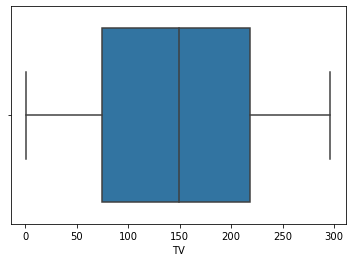

In [20]:
sns.boxplot(df.TV)

<AxesSubplot:xlabel='Radio'>

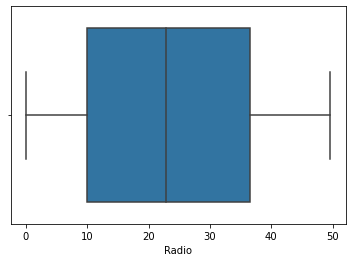

In [21]:
sns.boxplot(df.Radio)

<AxesSubplot:xlabel='Newspaper'>

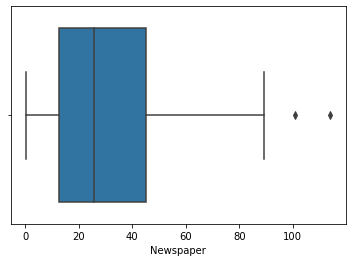

In [22]:
sns.boxplot(df.Newspaper)

<AxesSubplot:xlabel='Sales', ylabel='Density'>

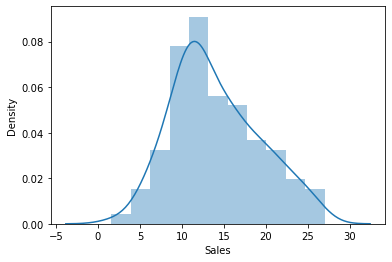

In [24]:
sns.distplot(df.Sales)

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [9]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<AxesSubplot:>

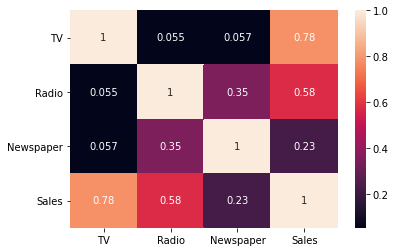

In [10]:
sns.heatmap(df.corr(),annot=True)

In [12]:
def regression_funct(x,y):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
        
    return result.sort_values('R_Squared',ascending=False)

In [13]:
x,y=df.drop("Sales",axis=1),df[["Sales"]]

In [16]:
x.shape,y.shape

((200, 3), (200, 1))

In [17]:
regression_funct(x,y)

,R_Squared,RMSE,MAE
GradientBoostingRegressor,0.982861,0.735495,0.619265
ExtraTreeRegressor,0.930957,1.476228,1.067500
KNeighborsRegressor,0.910620,1.679625,1.189000
Lasso,0.900401,1.773046,1.452202
ElasticNet,0.899961,1.776959,1.456659
Ridge,0.899438,1.781599,1.460766
LinearRegression,0.899438,1.781600,1.460757


## Deep Learning Uygulanırsa?

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import  r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [26]:
x=scaler.fit_transform(x)

In [27]:
x.shape,y.shape

((200, 3), (200, 1))

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.20, random_state=42)

In [29]:
model=Sequential()
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(200, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='Adam', loss='mse')#mse regression

In [30]:
model.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), batch_size=128, epochs=450, verbose=1)

Epoch 1/450
2/2 [==============================] - 2s 196ms/step - loss: 224.1540 - val_loss: 215.0627
Epoch 2/450
2/2 [==============================] - 0s 24ms/step - loss: 219.2146 - val_loss: 202.7691
Epoch 3/450
2/2 [==============================] - 0s 17ms/step - loss: 205.0638 - val_loss: 171.6962
Epoch 4/450
2/2 [==============================] - 0s 18ms/step - loss: 170.2851 - val_loss: 104.1950
Epoch 5/450
2/2 [==============================] - 0s 18ms/step - loss: 96.9728 - val_loss: 14.1657
Epoch 6/450
2/2 [==============================] - 0s 18ms/step - loss: 15.7798 - val_loss: 72.9923
Epoch 7/450
2/2 [==============================] - 0s 19ms/step - loss: 57.7933 - val_loss: 14.2400
Epoch 8/450
2/2 [==============================] - 0s 18ms/step - loss: 10.0199 - val_loss: 16.9773
Epoch 9/450
2/2 [==============================] - 0s 17ms/step - loss: 17.6345 - val_loss: 27.9381
Epoch 10/450
2/2 [==============================] - 0s 19ms/step - loss: 27.6256 - val_loss

2/2 [==============================] - 0s 21ms/step - loss: 0.0956 - val_loss: 0.3382
Epoch 166/450
2/2 [==============================] - 0s 18ms/step - loss: 0.0893 - val_loss: 0.3035
Epoch 167/450
2/2 [==============================] - 0s 19ms/step - loss: 0.0948 - val_loss: 0.3041
Epoch 168/450
2/2 [==============================] - 0s 19ms/step - loss: 0.0919 - val_loss: 0.2957
Epoch 169/450
2/2 [==============================] - 0s 21ms/step - loss: 0.0901 - val_loss: 0.3018
Epoch 170/450
2/2 [==============================] - 0s 19ms/step - loss: 0.0886 - val_loss: 0.3175
Epoch 171/450
2/2 [==============================] - 0s 22ms/step - loss: 0.0943 - val_loss: 0.2890
Epoch 172/450
2/2 [==============================] - 0s 20ms/step - loss: 0.0869 - val_loss: 0.2899
Epoch 173/450
2/2 [==============================] - 0s 19ms/step - loss: 0.0849 - val_loss: 0.3077
Epoch 174/450
2/2 [==============================] - 0s 21ms/step - loss: 0.0831 - val_loss: 0.3214
Epoch 175/450


2/2 [==============================] - 0s 18ms/step - loss: 0.0666 - val_loss: 0.2462
Epoch 248/450
2/2 [==============================] - 0s 29ms/step - loss: 0.0651 - val_loss: 0.2386
Epoch 249/450
2/2 [==============================] - 0s 18ms/step - loss: 0.0653 - val_loss: 0.2581
Epoch 250/450
2/2 [==============================] - 0s 18ms/step - loss: 0.0634 - val_loss: 0.2803
Epoch 251/450
2/2 [==============================] - 0s 18ms/step - loss: 0.0630 - val_loss: 0.2836
Epoch 252/450
2/2 [==============================] - 0s 18ms/step - loss: 0.0635 - val_loss: 0.2733
Epoch 253/450
2/2 [==============================] - 0s 19ms/step - loss: 0.0631 - val_loss: 0.2628
Epoch 254/450
2/2 [==============================] - 0s 17ms/step - loss: 0.0678 - val_loss: 0.2725
Epoch 255/450
2/2 [==============================] - 0s 17ms/step - loss: 0.0641 - val_loss: 0.2994
Epoch 256/450
2/2 [==============================] - 0s 17ms/step - loss: 0.0671 - val_loss: 0.2964
Epoch 257/450


2/2 [==============================] - 0s 20ms/step - loss: 0.0566 - val_loss: 0.2717
Epoch 330/450
2/2 [==============================] - 0s 18ms/step - loss: 0.0564 - val_loss: 0.2865
Epoch 331/450
2/2 [==============================] - 0s 18ms/step - loss: 0.0623 - val_loss: 0.2717
Epoch 332/450
2/2 [==============================] - 0s 19ms/step - loss: 0.0575 - val_loss: 0.2763
Epoch 333/450
2/2 [==============================] - 0s 19ms/step - loss: 0.0610 - val_loss: 0.2694
Epoch 334/450
2/2 [==============================] - 0s 20ms/step - loss: 0.0633 - val_loss: 0.2373
Epoch 335/450
2/2 [==============================] - 0s 20ms/step - loss: 0.0569 - val_loss: 0.2501
Epoch 336/450
2/2 [==============================] - 0s 22ms/step - loss: 0.0643 - val_loss: 0.2993
Epoch 337/450
2/2 [==============================] - 0s 20ms/step - loss: 0.0830 - val_loss: 0.3054
Epoch 338/450
2/2 [==============================] - 0s 22ms/step - loss: 0.0545 - val_loss: 0.2883
Epoch 339/450


Epoch 411/450
2/2 [==============================] - 0s 17ms/step - loss: 0.0694 - val_loss: 0.2471
Epoch 412/450
2/2 [==============================] - 0s 17ms/step - loss: 0.0536 - val_loss: 0.2615
Epoch 413/450
2/2 [==============================] - 0s 17ms/step - loss: 0.0603 - val_loss: 0.3018
Epoch 414/450
2/2 [==============================] - 0s 19ms/step - loss: 0.0757 - val_loss: 0.2925
Epoch 415/450
2/2 [==============================] - 0s 18ms/step - loss: 0.0620 - val_loss: 0.3010
Epoch 416/450
2/2 [==============================] - 0s 20ms/step - loss: 0.0639 - val_loss: 0.2845
Epoch 417/450
2/2 [==============================] - 0s 17ms/step - loss: 0.0593 - val_loss: 0.2515
Epoch 418/450
2/2 [==============================] - 0s 18ms/step - loss: 0.0519 - val_loss: 0.2484
Epoch 419/450
2/2 [==============================] - 0s 18ms/step - loss: 0.0536 - val_loss: 0.2668
Epoch 420/450
2/2 [==============================] - 0s 18ms/step - loss: 0.0562 - val_loss: 0.2680


In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               800       
_________________________________________________________________
dense_1 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_6 (Dense)              (None, 200)               4

<AxesSubplot:>

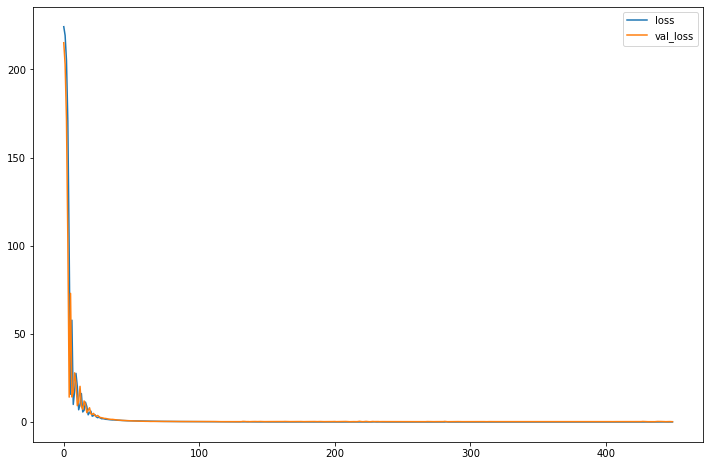

In [32]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))

In [33]:
pred=model.predict(x_test)

In [34]:
(mean_squared_error(y_test,pred))**.5

0.49125361828357084

In [35]:
r2_score(y_test,pred) 

0.9923541622228393